In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [9]:
dataset="C:\\Users\\aryan\\Group4-Codes\\normal"
imagePaths=list(paths.list_images(dataset))


data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)


In [10]:
len(data)

186

In [11]:
labels[0]

'normal'

In [12]:
dataset="C:\\Users\\aryan\\Group4-Codes\\osteporosis"
imagePaths=list(paths.list_images(dataset))

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

In [13]:
data[0]

array([[[-103.939  , -116.779  , -123.68   ],
        [-103.939  , -116.779  , -123.68   ],
        [-103.939  , -116.779  , -123.68   ],
        ...,
        [-103.939  , -116.779  , -123.68   ],
        [-103.939  , -116.779  , -123.68   ],
        [-103.939  , -116.779  , -123.68   ]],

       [[-103.939  , -116.779  , -123.68   ],
        [-103.939  , -116.779  , -123.68   ],
        [-103.939  , -116.779  , -123.68   ],
        ...,
        [-103.939  , -116.779  , -123.68   ],
        [-103.939  , -116.779  , -123.68   ],
        [-103.939  , -116.779  , -123.68   ]],

       [[-103.939  , -116.779  , -123.68   ],
        [-103.939  , -116.779  , -123.68   ],
        [-103.939  , -116.779  , -123.68   ],
        ...,
        [-103.939  , -116.779  , -123.68   ],
        [-103.939  , -116.779  , -123.68   ],
        [-103.939  , -116.779  , -123.68   ]],

       ...,

       [[-103.939  , -116.779  , -123.68   ],
        [-103.939  , -116.779  , -123.68   ],
        [-103.939  , -

In [14]:
labels[200]

'osteporosis'

In [15]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [16]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
#labels=to_categorical(labels)

In [17]:
dev_X,test_X,dev_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [18]:
train_X, valid_X, train_Y, valid_Y = train_test_split(dev_X,dev_Y,test_size=0.125, random_state=10)

In [19]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,brightness_range=[0.5,1.5],fill_mode='nearest')

In [20]:
baseModel=ResNet50(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

print(baseModel.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [21]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(256,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(1,activation='sigmoid')(headModel)

In [22]:
model=Model(inputs=baseModel.input,outputs=headModel)

In [23]:
for layer in baseModel.layers:
    layer.trainable=False

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [24]:
learning_rate=0.001
Epochs=50
BS=16

In [25]:
opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(valid_X,valid_Y),
    validation_steps=len(valid_X)//BS,
    epochs=Epochs
)

D:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
16/16 [==============================] - 17s 800ms/step - loss: 1.1222 - accuracy: 0.5859 - val_loss: 1.1583 - val_accuracy: 0.5263
Epoch 2/50
16/16 [==============================] - 12s 724ms/step - loss: 0.7508 - accuracy: 0.6758 - val_loss: 0.5287 - val_accuracy: 0.7895
Epoch 3/50
16/16 [==============================] - 12s 720ms/step - loss: 0.6375 - accuracy: 0.7243 - val_loss: 0.5660 - val_accuracy: 0.8158
Epoch 4/50
16/16 [==============================] - 12s 752ms/step - loss: 0.6520 - accuracy: 0.6996 - val_loss: 0.4990 - val_accuracy: 0.8158
Epoch 5/50
16/16 [==============================] - 12s 758ms/step - loss: 0.5688 - accuracy: 0.6872 - val_loss: 0.4909 - val_accuracy: 0.7632
Epoch 6/50
16/16 [==============================] - 12s 752ms/step - loss: 0.5366 - accuracy: 0.7654 - val_loss: 0.5233 - val_accuracy: 0.7632
Epoch 7/50
16/16 [==============================] - 12s 778ms/step - loss: 0.5493 - accuracy: 0.7407 - val_loss: 0.4928 - val_accuracy: 0.8158

In [26]:
predict=model.predict(test_X,batch_size=BS)
predict=np.round_(predict)
print(classification_report(test_Y,predict,target_names=lb.classes_))

5/5 [==============================] - 4s 588ms/step
              precision    recall  f1-score   support

      normal       0.85      0.62      0.72        37
 osteporosis       0.71      0.89      0.79        38

    accuracy                           0.76        75
   macro avg       0.78      0.76      0.75        75
weighted avg       0.78      0.76      0.76        75



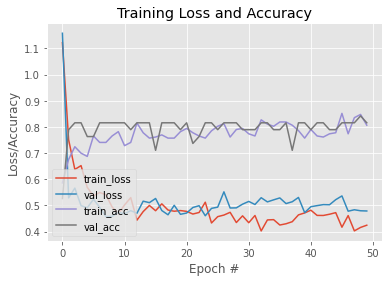

In [29]:
N = 50
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

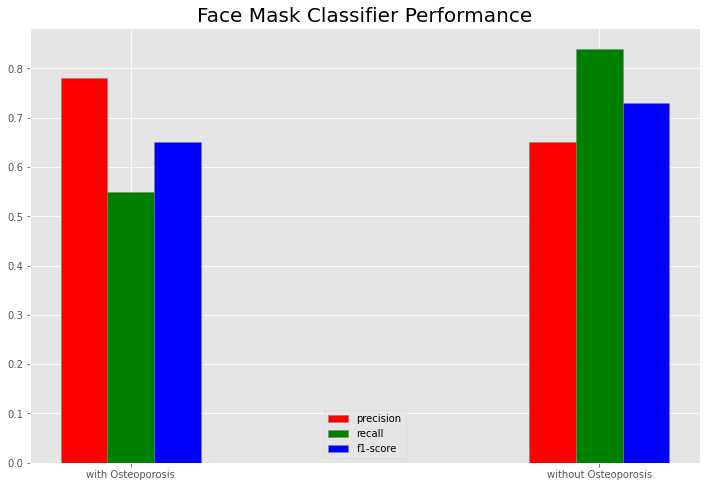

In [28]:
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

precision = [0.78, 0.65]
recall = [0.55, 0.84]
f1 = [0.65, 0.73]

br1 = np.arange(len(precision))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, precision, color ='r', width = barWidth, edgecolor ='grey', label ='precision')
plt.bar(br2, recall, color ='g', width = barWidth, edgecolor ='grey', label ='recall')
plt.bar(br3, f1, color ='b', width = barWidth, edgecolor ='grey', label ='f1-score')

plt.title("Face Mask Classifier Performance", fontsize = 20)
plt.xticks([r + barWidth for r in range(len(precision))],
        ['with Osteoporosis', 'without Osteoporosis'])
 
plt.legend()
plt.show()

In [24]:
save_path = './Osteoporosis_Classification_ResNet_model.h5'
model.save(save_path)